##  Теор задачи

### 1 задание

К вам обратился продюсер, который снимает кино. Он наслышан, что при помощи статистики можно получить ответы на все вопросы! Компания уже потратила 10 миллионов на производство фильма (cost), а также было продано книг на 8 миллионов долларов (books). Продюсер интересуется, сколько вы посоветуете ему потратить миллионов на рекламу фильма (promotion), если он хочет, чтобы сборы от фильма составили 150 миллионов?
Рассчитайте необходимое количество миллионов на рекламу, основываясь на регрессионном уравнении из прошлого задания. В уравнении регрессии используйте только само число миллионов  в качестве коэффициентов: например, 10 миллионов мы запишем в уравнении просто как 10, а не 10 000 000.

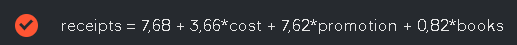

Ответ: 13

### 2 задание
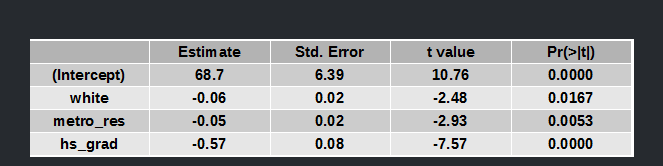

Основываясь на итоговой регрессионной модели, давайте вновь выполним задачу предсказания. Какой процент людей, проживающих в бедности, ожидается, если:

- процент людей со средним образованием (hs_grad) равен 90; 
- процент людей, проживающих в столичной области (metro_res), равен 80;
- процент белокожего населения (white) равен 50.

Ответ укажите с одним знаком после точки.

In [2]:
68.7 - 0.06 * 50 - 0.05 * 80 - 0.57 * 90

10.400000000000006

# Проектные задачи

1) Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

2) Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

3) Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

4) Преобразуйте категориальные переменные с помощью pd.get_dummies(). 

5) Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? 

6) Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \(R^2\), коэффициентах и их значимости. Какую модель лучше оставить? 

7) Заполните пропуски в результатах.

1) Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import seaborn as sns

In [2]:
cars = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/lessons/statistics/cars.csv')

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

2) Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

In [5]:
cars['company'] = cars['CarName'].apply(lambda x: x.split(' ')[0])


In [6]:
cars = cars.drop(columns = ['car_ID', 'CarName'])

In [7]:
cars.company.nunique()

28

3) Теперь внимательнее посмотрите на уникальные значения company. Часть из них оказалась с ошибками!

'maxda' → 'mazda'

'Nissan' → 'nissan'

'porcshce' → 'porsche'

'toyouta' → 'toyota'

'vokswagen' & 'vw' → 'volkswagen'

Сколько уникальных производителей осталось в итоге?

In [8]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}


In [10]:
cars.company = cars.company.replace(corrections)

In [11]:
cars.company.nunique()

22

3) Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

In [12]:
need_columns = ['price','company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']

In [13]:
cars = cars[need_columns]

In [14]:
correlation_matrix = cars.corr()

In [15]:
correlation_matrix

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
price,1.000000,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139
wheelbase,0.577816,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294
carlength,0.682920,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623
carwidth,0.759325,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732
curbweight,0.835305,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739
enginesize,0.874145,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769
boreratio,0.553173,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677
horsepower,0.808139,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000


In [16]:
correlation_matrix.loc['price', 'horsepower'].round(2)

0.81

4) Преобразуйте категориальные переменные с помощью pd.get_dummies(). 

In [19]:
cars.head()

,price,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154
3,13950.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102
4,17450.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115


In [25]:
cars.dtypes

price             float64
company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
dtype: object

In [34]:
objects = cars.select_dtypes(include=['object']).columns

In [51]:
cars_dummy = pd.get_dummies(data=cars, drop_first = True)

In [52]:
cars_dummy

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,188.8,68.9,2952,141,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,188.8,68.8,3049,141,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,188.8,68.9,3012,173,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,188.8,68.9,3217,145,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [38]:
df_full = pd.get_dummies(data=cars, drop_first = True)

In [40]:
df_full.shape

(205, 49)

5) Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? 

In [42]:
X = cars['horsepower']
y = cars['price']



In [43]:
# Добавление константы для уравнения регрессии
X = sm.add_constant(X)

# Создание и обучение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов с помощью summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.48e-48
Time:                        07:44:01   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

6) Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в (R^2), коэффициентах и их значимости. Какую модель лучше оставить?

1 МОДЕЛЬ

In [53]:
cars_dummy

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,188.8,68.9,2952,141,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,188.8,68.8,3049,141,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,188.8,68.9,3012,173,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,188.8,68.9,3217,145,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [74]:
X1 = sm.add_constant(cars_dummy.drop(columns = 'price'))

In [75]:
model = sm.OLS(y, X1).fit()

# Вывод результатов с помощью summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.86e-89
Time:                        08:18:09   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

2 МОДЕЛЬ

In [76]:
cars_dummy_2 = cars.drop(columns='company')

cars_dummy_2 = pd.get_dummies(data=cars_dummy_2, drop_first = True)

cars_dummy_2

y2 = cars_dummy_2['price']

X2 = sm.add_constant(cars_dummy_2.drop(columns=['price'])) 

model = sm.OLS(y2, X2).fit()

# Вывод результатов с помощью summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           9.86e-81
Time:                        08:18:20   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+